In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [8]:
data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

# selected variable from GUI
select_feature=['Area','Perimeter']
select_class=['BOMBAY','CALI']
select_eta=0.01
select_epoch=100
select_mse_thre=0.001
select_bias=True

filter_data=data[data['Class'].isin(select_class)]
X=filter_data[select_feature]
y=filter_data['Class']

X = (X - X.min()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

***Perceptron learning algorithm
***

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score

class Perceptron:
    def __init__(self, select_eta, select_epoch, select_mse_thre, select_bias):
        self.select_eta = select_eta
        self.select_epoch = select_epoch
        self.select_mse_thre = select_mse_thre
        self.select_bias = select_bias

    def signum(self, x):
        return np.where(x >= 0, 1, 0)

    def calculate_mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def calculate_accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def fit(self, X, y):
        # Initialize the weights
        if self.select_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        else:
            X = np.c_[np.zeros(X.shape[0]), X]

        self.weights = np.random.rand(X.shape[1])
        mse_list = []  # to store MSE values during training

        for i in range(self.select_epoch):
            net_value = np.dot(X, self.weights)
            Pred_output=self.signum(net_value)
            error = y - Pred_output

            #mse = mean_squared_error(y, Pred_output)
            #mse_list.append(mse)

            mse = self.calculate_mse(y, Pred_output)
            mse_list.append(mse)

            self.weights += self.select_eta * np.dot(X.T, error)

            if mse < self.select_mse_thre:
                break

        return mse_list

    def predict(self, X):

        if self.select_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        else:
            X = np.c_[np.zeros(X.shape[0]), X]

        net_value = np.dot(X, self.weights)
        Pred_output = self.signum(net_value)

        return Pred_output

In [44]:
# Train the model
model = Perceptron(0.001, 100, 0.001, True)
mse_list = model.fit(X_train, y_train) #return error in train
y_pred = model.predict(X_test)

final_mse = mse_list[-1]
print(f'Final Mean Squared Error for train (MSE): {final_mse:.6f}')

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Final Mean Squared Error for train (MSE): 0.000000
Accuracy: 100.00%


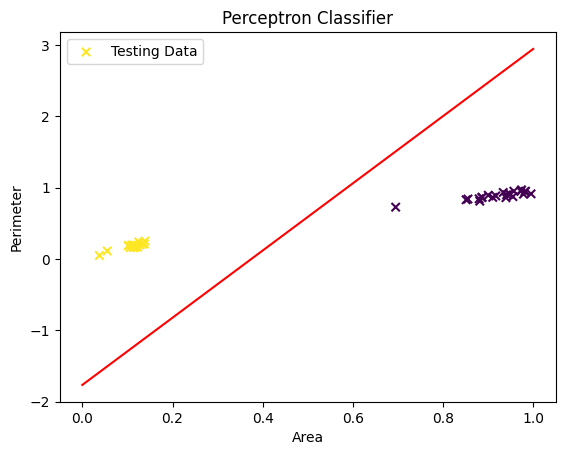

In [45]:
def plot():

  #plt.scatter(X_train['Area'], X_train['Perimeter'], c=y_train, cmap='viridis', label='Training Data')

  # Scatter testing data
  plt.scatter(X_test['Area'], X_test['Perimeter'], c=y_test, cmap='viridis', marker='x', label='Testing Data')

  # Draw the decision boundary line
  w1, w2 = model.weights[1:]
  b = model.weights[0]
  x_line = np.linspace(np.min(X_train['Perimeter']), np.max(X_train['Perimeter']), num=100)
  y_line = -(w1 * x_line + b) / w2

  plt.plot(x_line, y_line, color='red')

  plt.xlabel('Area')
  plt.ylabel('Perimeter')
  plt.title('Perceptron Classifier')
  plt.legend()
  return plt.show()

plot()

In [46]:
# sample features
#sample_features= sample_features.pd.DataFrame([[126503, 1326.959], [49245, 822.642]])
sample_features = np.array([[126503, 1326.959], [49245, 822.642]])


#sample_features = (sample_features - X.min()) / (X.max() - X.min())

y_out = model.predict(sample_features)

print("Net Value:", np.dot(np.c_[np.ones(sample_features.shape[0]), sample_features], model.weights))

print("Actual Output:", model.signum(np.dot(np.c_[np.ones(sample_features.shape[0]), sample_features], model.weights)))

print("y:",y_out)

accuracy = model.calculate_accuracy(y_test, y_pred)
print(f'Accuracy test: {accuracy * 100:.2f}%')


Net Value: [-7487.26862876 -2910.7724167 ]
Actual Output: [0 0]
y: [0 0]
Accuracy test: 100.00%


In [34]:
"""import numpy as np

sample_features = np.array([[126503, 1326.959]])
#, [49245, 822.642]
# Reshape sample_features to 1-dimensional array
sample_features = sample_features.flatten()

# Normalize the data
sample_features = (sample_features - X.min()) / (X.max() - X.min())

# Add bias term
sample_features_with_bias = np.concatenate(([1], sample_features))

# Adjust the shape of model.weights
model_weights = model.weights.reshape(-1, 1)

# Calculate Net Value
net_value = np.dot(sample_features_with_bias, model_weights)
print("Net Value:", net_value)

# Calculate Actual Output
actual_output = model.signum(sample_features_with_bias, model_weights)
print("Actual Output:", actual_output)

y_out = model.predict(sample_features)
print("y:", y_out)

accuracy = model.calculate_accuracy(y_test, y_pred)
print(f'Accuracy test: {accuracy * 100:.2f}%')"""

Net Value: [-3339.58039461]


TypeError: ignored

In [47]:
def calculate_confusion_matrix(actual, predicted):
    tp = np.sum((actual == 1) & (predicted == 1))
    tn = np.sum((actual == 0) & (predicted == 0))
    fp = np.sum((actual == 0) & (predicted == 1))
    fn = np.sum((actual == 1) & (predicted == 0))
    return tp, tn, fp, fn
tp, tn, fp, fn = calculate_confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

Confusion Matrix:
True Positives (TP): 17
True Negatives (TN): 23
False Positives (FP): 0
False Negatives (FN): 0
